In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load Data
full_data = pd.read_csv("../data/processed/training_target_df_20241108-123515.csv")
# print(full_data.head())

# Filter data
full_data = full_data[full_data['True_county_inc_deaths'] >= 0]

# Fit Poisson regression model
X = full_data[['Naive_proj_deaths']]
X = sm.add_constant(X)  # Add an intercept
y = full_data['True_county_inc_deaths']

# mdl_pois_1 = sm.GLM(y, X, family=sm.families.Poisson()).fit()
mdl_pois_1 = sm.GLM(y, X).fit()


# Model summary
print(mdl_pois_1.summary())

# Add predictions and calculate absolute errors
full_data['pois_pred'] = mdl_pois_1.predict(X)
full_data['pois_abs_err'] = abs(full_data['pois_pred'] - full_data['True_county_inc_deaths'])
full_data['naive_abs_err'] = abs(full_data['Naive_proj_deaths'] - full_data['True_county_inc_deaths'])

                   Generalized Linear Model Regression Results                    
Dep. Variable:     True_county_inc_deaths   No. Observations:                 9808
Model:                                GLM   Df Residuals:                     9806
Model Family:                    Gaussian   Df Model:                            1
Link Function:                   Identity   Scale:                          14.874
Method:                              IRLS   Log-Likelihood:                -27155.
Date:                    Thu, 23 Jan 2025   Deviance:                   1.4586e+05
Time:                            16:39:25   Pearson chi2:                 1.46e+05
No. Iterations:                         3   Pseudo R-squ. (CS):             0.4125
Covariance Type:                nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

In [17]:
# Summarize errors
summary = {
    'pois_err': (full_data['pois_abs_err']).sum(),
    'naive_err': (full_data['naive_abs_err']).sum()
}
print(summary)

summary = {
    'pois_err': (full_data['pois_abs_err'] ** 2).sum(),
    'naive_err': (full_data['naive_abs_err'] ** 2).sum()
}
print(summary)

{'pois_err': 20397.879170578024, 'naive_err': 19068.098376856196}
{'pois_err': 145858.00186876045, 'naive_err': 180851.3155641751}


(0.0, 10.0)

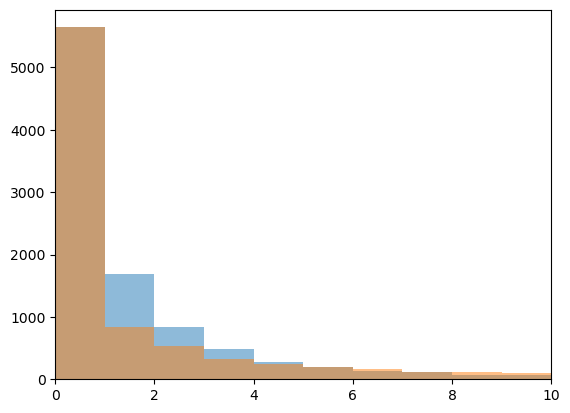

In [18]:
plt.hist(full_data['naive_abs_err'], bins = range(0,100), alpha = 0.5)
plt.hist(full_data['naive_abs_err'] ** 2, bins = range(0,100), alpha = 0.5)
plt.xlim((0,10))

(0.0, 10.0)

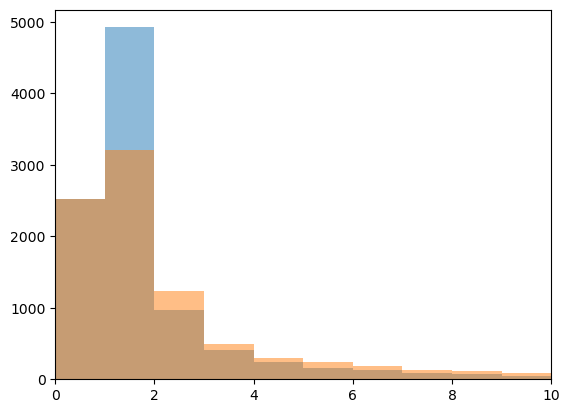

In [19]:
plt.hist(full_data['pois_abs_err'], bins = range(0,100), alpha = 0.5)
plt.hist(full_data['pois_abs_err'] ** 2, bins = range(0,100), alpha = 0.5)
plt.xlim((0,10))

In [20]:
full_data['pois_abs_err'].sum()

20397.879170578024

In [21]:
(full_data['pois_abs_err'] ** 2).sum()

145858.00186876045

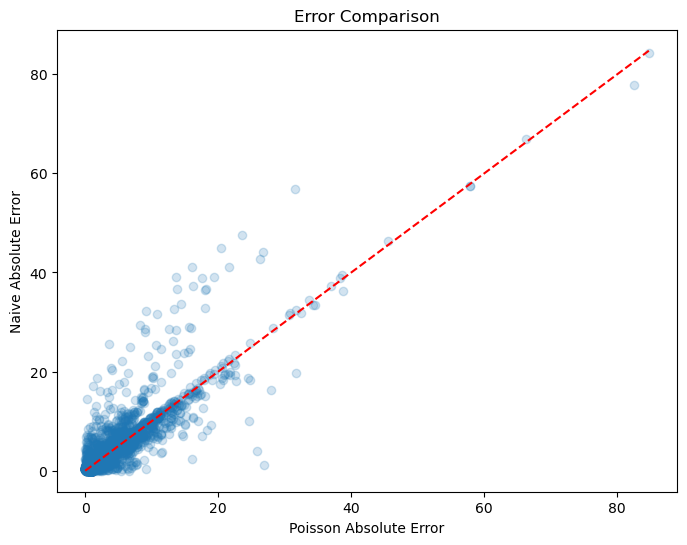

In [22]:
# Plot comparison of errors
plt.figure(figsize=(8, 6))
plt.scatter(full_data['pois_abs_err'], full_data['naive_abs_err'], alpha=0.2)
# plt.xscale('sqrt')
# plt.yscale('sqrt')
plt.plot([0, max(full_data['pois_abs_err'].max(), full_data['naive_abs_err'].max())], 
         [0, max(full_data['pois_abs_err'].max(), full_data['naive_abs_err'].max())], 
         linestyle='--', color='red')
plt.xlabel('Poisson Absolute Error')
plt.ylabel('Naive Absolute Error')
plt.title('Error Comparison')
plt.show()

In [90]:
num = 10
a = pd.Series(([0.1] * num) + [5])
b = pd.Series(([1.1] * num) + [3])

In [91]:
a.sum()

6.0

In [92]:
b.sum()

14.0

In [93]:
(a**2).sum()

25.1

In [94]:
(b**2).sum()

21.1